In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

floating_data_path = join(data_dir, 'SeoulFloating.csv')

floating = pd.read_csv(floating_data_path)

In [3]:
print('floating data dim : {}'.format(floating.shape))

floating data dim : (1084800, 7)


In [4]:
print(floating.columns)

Index(['date', 'hour', 'birth_year', 'sex', 'province', 'city', 'fp_num'], dtype='object')


In [33]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [56]:
floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,1970-01-01 00:00:00.000000001,0,20,female,Seoul,Dobong-gu,19140
1,1970-01-01 00:00:00.000000001,0,20,male,Seoul,Dobong-gu,19950
2,1970-01-01 00:00:00.000000001,0,20,female,Seoul,Dongdaemun-gu,25450
3,1970-01-01 00:00:00.000000001,0,20,male,Seoul,Dongdaemun-gu,27050
4,1970-01-01 00:00:00.000000001,0,20,female,Seoul,Dongjag-gu,28880


In [5]:
floating.tail()

,date,hour,birth_year,sex,province,city,fp_num
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420
1084799,2020-05-31,23,40,male,Seoul,Eunpyeong-gu,38650


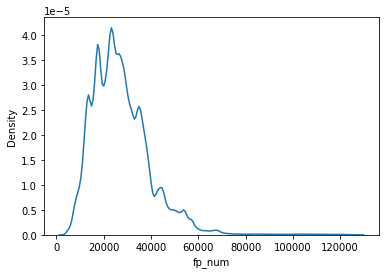

In [10]:
sns.kdeplot(floating['fp_num'])
plt.show()

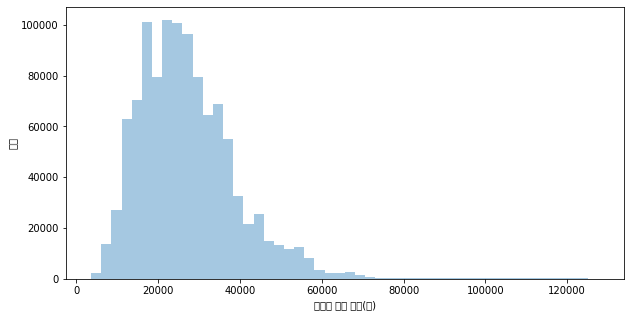

In [11]:
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(floating['fp_num'],kde=False) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

# 정부 정책에 따른 확진자수 변화 

In [6]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

policy_data_path = join(data_dir, 'Policy.csv')

policy = pd.read_csv(policy_data_path)

In [7]:
policy.tail()

,policy_id,country,type,gov_policy,detail,start_date,end_date
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN
60,61,Korea,Health,Extends Tightened Quarantine Measures,Gov't Extends Tightened Quarantine Measures in...,2020-05-28,2020-06-14


In [8]:
patient_data_path = join(data_dir, 'PatientInfo.csv')

patient = pd.read_csv(patient_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(patient.shape)

(5165, 14)


In [40]:
patient.tail()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated
5164,7000000019,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [57]:
# patient_null = patient['patient_id'].dropna()
# print(patient_null.shape)
# patient.tail()

(5165,)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated
5164,7000000019,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [26]:
#x축
from datetime import datetime
duration = patient["confirmed_date"].unique()
# duration = pd.to_datetime(duration)

duration= duration[:-1]
duration = pd.to_datetime(duration).sort_values()
print(duration)
type(duration)
# duration=duration.loc[datetime(2020, 1, 23):datetime(2020, 6, 30)]

DatetimeIndex(['2020-01-20', '2020-01-23', '2020-01-26', '2020-01-27',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-05',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=148, freq=None)


pandas.core.indexes.datetimes.DatetimeIndex

In [27]:
#y축
# patient.groupby(patient['confirmed_date']).count() 
confirmed_case = patient["confirmed_date"].value_counts()
print(confirmed_case.shape)

(148,)


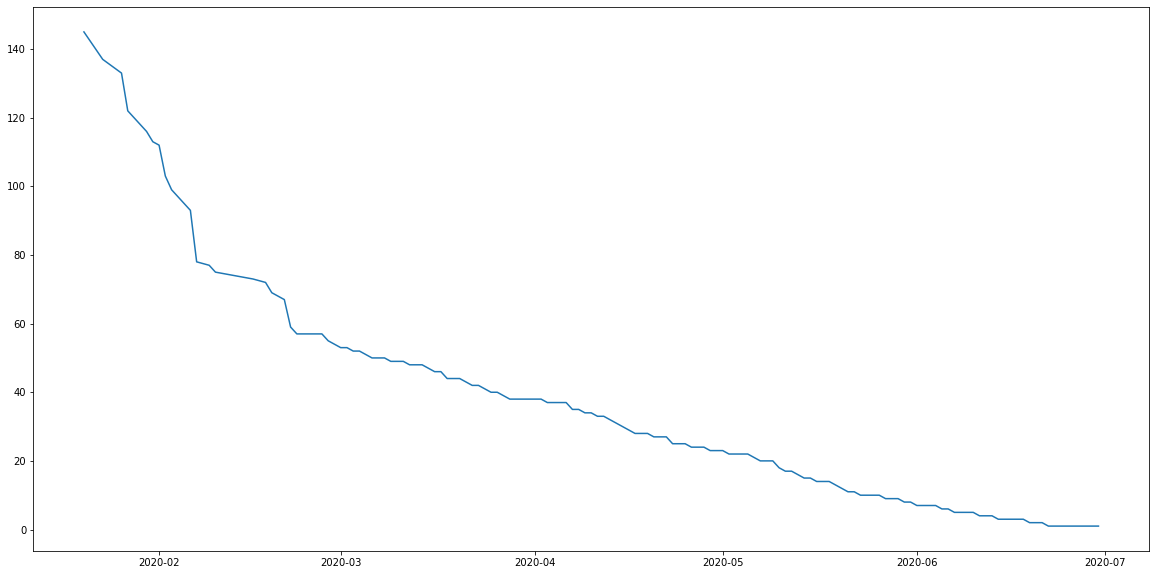

In [58]:
plt.figure(figsize=(20,10)) 
plt.plot(duration,confirmed_case)
plt.show()

확진자 감소 추이가 

In [29]:
search_data_path = join(data_dir, 'SearchTrend.csv')

search = pd.read_csv(search_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(search.shape)

(1642, 5)


In [30]:
search.columns

Index(['date', 'cold', 'flu', 'pneumonia', 'coronavirus'], dtype='object')

In [32]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


In [51]:
floating2 = pd.read_csv(floating_data_path)

# 일자별 이동량 합산

In [55]:
fl = floating2.groupby(by = 'date').fp_num.agg('sum')
fl

date
2020-01-01    192406170
2020-01-02    202929360
2020-01-03    203337150
2020-01-04    197396050
2020-01-05    195747670
                ...    
2020-05-27    199293080
2020-05-28    199209840
2020-05-29    140847320
2020-05-30    189674150
2020-05-31    188346500
Name: fp_num, Length: 151, dtype: int64

In [66]:
# a = fl.max()
# index = fl.index(a)
# index
fl[fl == fl.max()].index[0]

'2020-02-23'

In [67]:
fl[fl == fl.min()].index[0]

'2020-05-29'

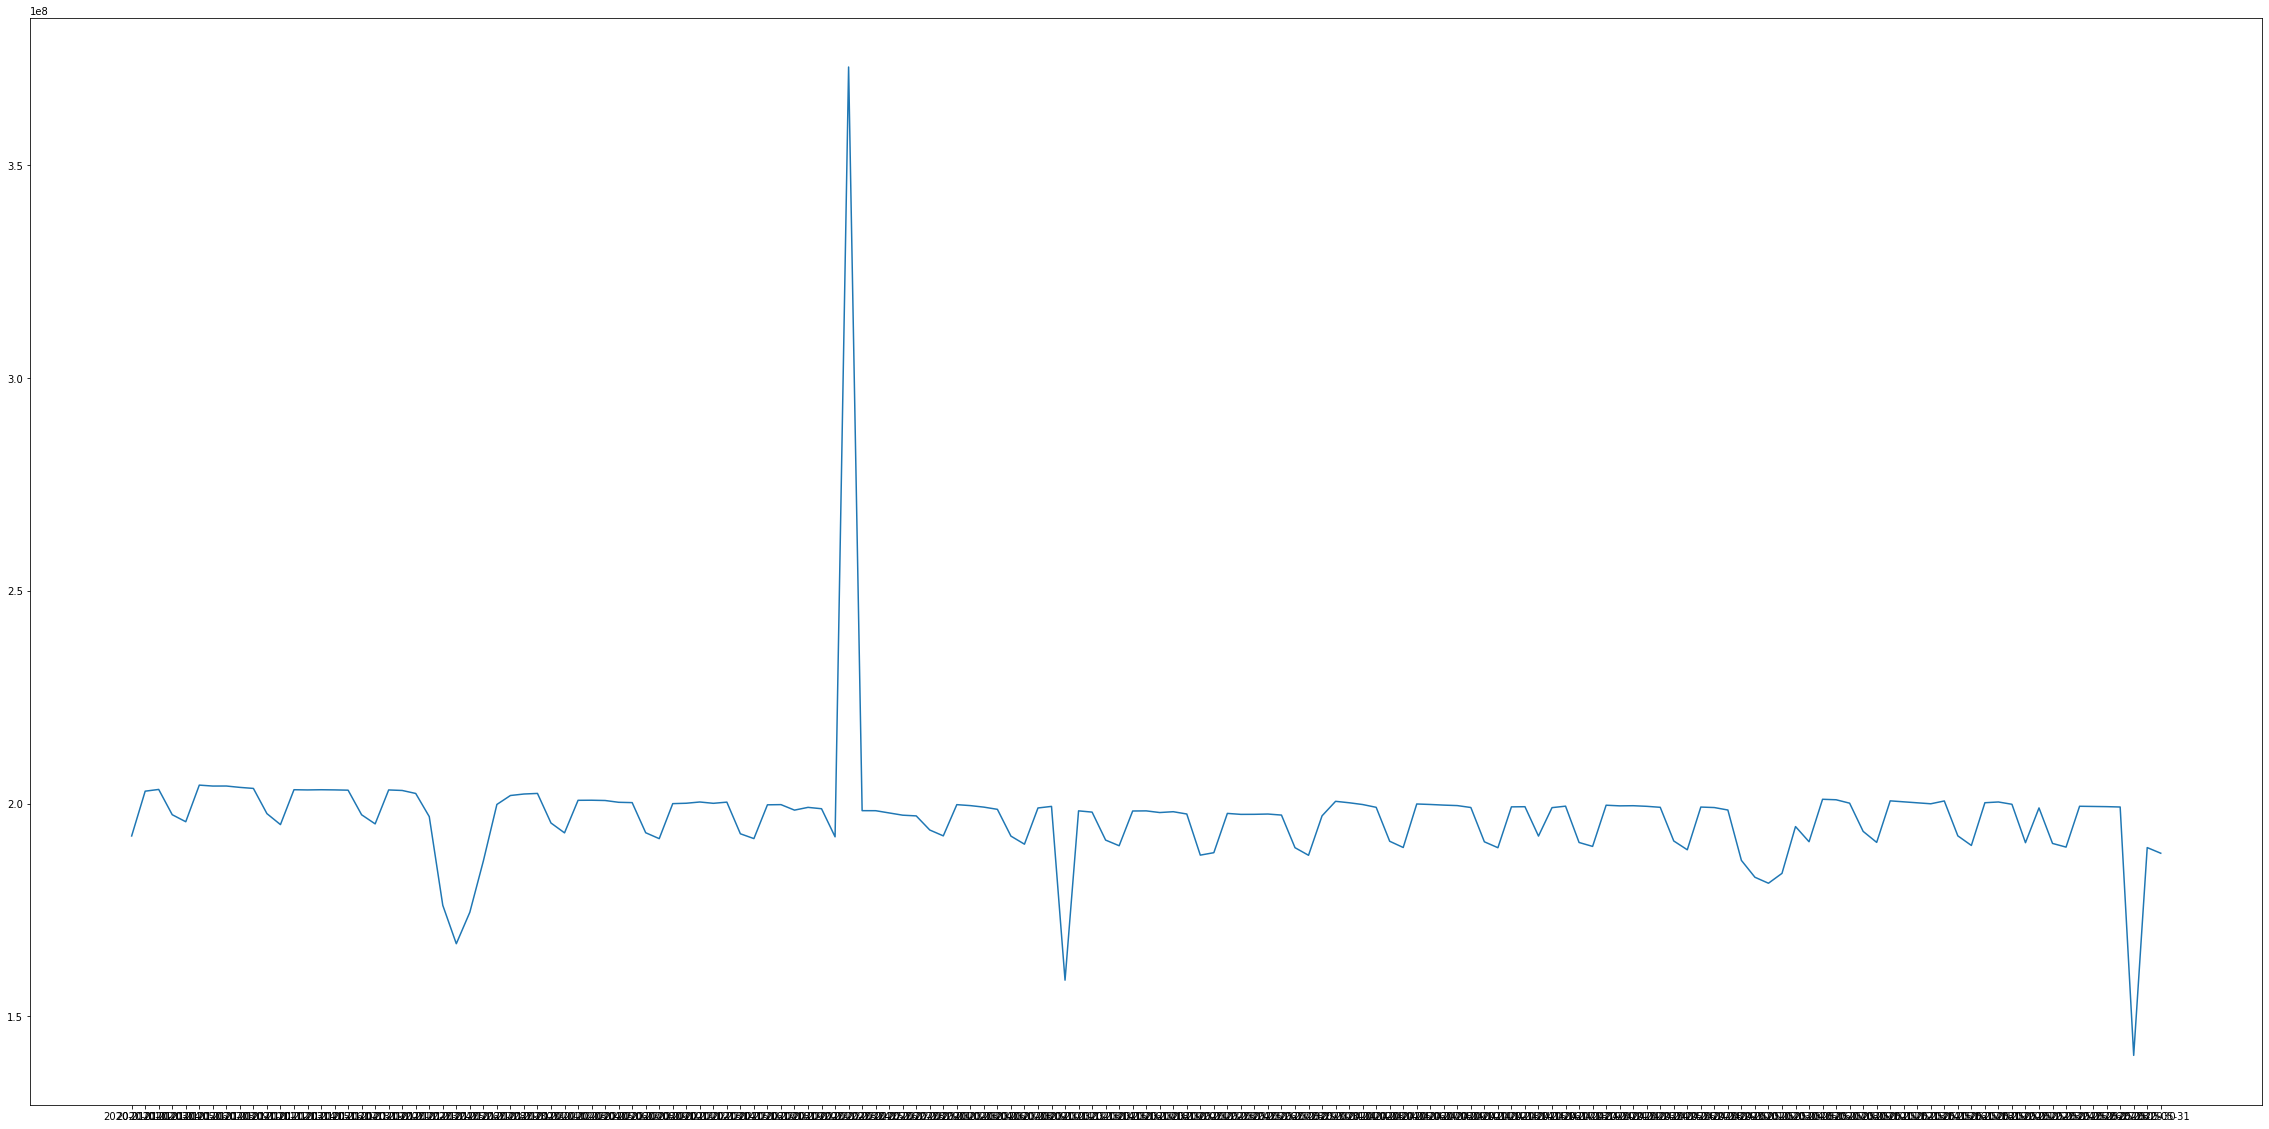

In [68]:
plt.figure(figsize=(40,20)) 
plt.plot(fl)
plt.show()

# 연령대별 이동량 합산